<h1><font color="#113D68" size=6>Redes Neuronales Convolucionales</font></h1>

<h1><font color="#113D68" size=5>Práctica: Clasificar Fashion-MNIST con una CNN simple en Keras</font></h1>

<h1><font color="#113D68" size=4>Objetivo: Accuracy>0.89</font></h1>

El dataset [fashion_mnist](https://github.com/zalandoresearch/fashion-mnist) consta de 60,000 datos de entrenamiento y 10,000 datos de prueba con 10 categorías. Cada imagen en escala de grises tiene un tamaño de 28x28.

Si quieres saber más sobre el conjunto de datos Fashion-MNIST en este [artículo](https://arxiv.org/abs/1708.07747) (**Fashion-MNIST: a Novel Image Dataset for Benchmarking Machine Learning Algorithms**)

<br> **Label**	**Description**
<br> 0 T-shirt/top (Camiseta/top)
<br> 1 Trouser (Pantalón)
<br> 2 Pullover (Suéter)
<br> 3 Dress (Vestido)
<br> 4 Coat (Abrigo)
<br> 5 Sandal (Sandalia)
<br> 6 Shirt (Camisa)
<br> 7 Sneaker (Zapatilla deportiva)
<br> 8 Bag (Bolsa)
<br> 9 Ankle boot (Botín)

## Descargar los datos de Fashion MNIST
Primero, instalemos TensorFlow si no lo tenemos en nuestro entorno (No hace falta si estan trabajando en Google Colab) e importamos la liberia. Luego descargamos fashion-mnist, que es uno de los conjuntos de datos de Keras.

In [ ]:
import tensorflow as tf
# Eliminar warning
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

import numpy as np
import matplotlib.pyplot as plt

# Cargar los datos de entrenamiento y prueba premezclados de fashion-mnist
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

## Visualizar los datos

x_train shape: (60000, 28, 28) y_train shape: (60000,)
60000 train set
10000 test set
y = 2 Pullover


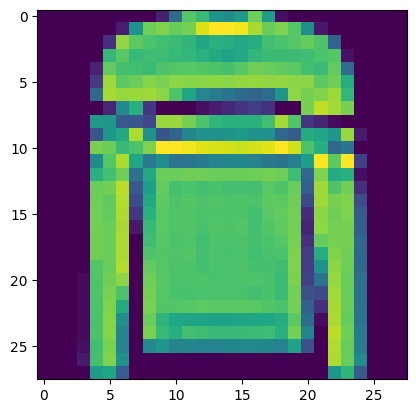

In [ ]:
# Imprime la forma(shape) del conjunto de entrenamiento:
# Observa que hayan 60,000 datos de entrenamiento con un tamaño de imagen de 28x28 y 60,000 etiquetas de entrenamiento.
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# Imprime el número de conjuntos de datos de entrenamiento y prueba.
print(x_train.shape[0], 'train set')
print(x_test.shape[0], 'test set')

# Definir las etiquetas de texto (puede ser en Castellano o en Ingles)
fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2
                        "Dress",        # index 3
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6
                        "Sneaker",      # index 7
                        "Bag",          # index 8
                        "Ankle boot"]   # index 9

# Image index, you can pick any number between 0 and 59,999
img_index = 5
# y_train contiene las etiquetas, que van del 0 al 9
label_index = y_train[img_index]
# Imprimir la etiqueta, por ejemplo 2 Pullover (Suéter)
print ("y = " + str(label_index) + " " +(fashion_mnist_labels[label_index]))
# Mostrar una de las imágenes del conjunto de datos de entrenamiento
plt.imshow(x_train[img_index])

## Normalización de datos
Normalizar las dimensiones de los datos para que estén aproximadamente en la misma escala.

In [ ]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [ ]:
print("Número de datos de entrenamiento - " + str(len(x_train)))
print("Número de datos de prueba - " + str(len(x_test)))

Número de datos de entrenamiento - 60000
Número de datos de prueba - 10000


## Dividir los datos en conjuntos de entrenamiento/validación/prueba
*   Datos de entrenamiento: se utilizan para entrenar el modelo
*   Datos de validación: se utilizan para ajustar los hiperparámetros y evaluar los modelos
*   Datos de prueba: se utilizan para probar el modelo después de que haya pasado por una evaluación inicial con el conjunto de validación.



In [ ]:
# Further break training data into train / validation sets (# put 5000 into validation set and keep remaining 55,000 for train)
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# Reshape input data from (28, 28) to (28, 28, 1)
w, h = 28, 28
x_train = x_train.reshape(x_train.shape[0], w, h, 1)
x_valid = x_valid.reshape(x_valid.shape[0], w, h, 1)
x_test = x_test.reshape(x_test.shape[0], w, h, 1)

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_valid = tf.keras.utils.to_categorical(y_valid, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Print training set shape
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# Print the number of training, validation, and test datasets
print(x_train.shape[0], 'train set')
print(x_valid.shape[0], 'validation set')
print(x_test.shape[0], 'test set')

x_train shape: (55000, 28, 28, 1) y_train shape: (55000, 10)
55000 train set
5000 validation set
10000 test set


## Crear la arquitectura del modelo

Existen dos APIs para definir un modelo en Keras:
1. [API de modelo secuencial](https://keras.io/models/sequential/)
2. [API funcional](https://keras.io/models/model/)

Para esta práctica se sugiere utilizar la API de modelo secuencial.
Si te interesa un tutorial utilizando la API funcional, consulta el blog de Sara Robinson [Prediciendo el precio del vino con la API funcional de Keras y TensorFlow.](https://medium.com/tensorflow/predicting-the-price-of-wine-with-the-keras-functional-api-and-tensorflow-a95d1c2c1b03).

Al definir el modelo, utilizaremos algunas de estas APIs de Keras:
*   Conv2D() [link text](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D/) - crea una capa convolucional
*   Pooling() [link text](https://keras.io/layers/pooling/) - crea una capa de agrupación (pooling)
*   Dropout() [link text](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout) - aplica dropout

In [ ]:
model = tf.keras.Sequential()

# Definir las capas de la red neuronal
# Primera capa convolucional con 64 filtros, tamaño de kernel 2x2, padding 'same', activación ReLU, y forma de entrada (28,28,1)
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1)))

# Capa de MaxPooling con tamaño de pool 2x2
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))

# Capa de Dropout con tasa de 0.3
model.add(tf.keras.layers.Dropout(0.3))

# Segunda capa convolucional con 32 filtros, tamaño de kernel 2x2, padding 'same', y activación ReLU
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))

# Capa de MaxPooling con tamaño de pool 2x2
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))

# Capa de Dropout con tasa de 0.3
model.add(tf.keras.layers.Dropout(0.3))

# Capa de Flatten para aplanar los datos antes de la capa densa
model.add(tf.keras.layers.Flatten())

# Capa densa con 256 neuronas y activación ReLU
model.add(tf.keras.layers.Dense(256, activation='relu'))

# Capa de Dropout con tasa de 0.5
model.add(tf.keras.layers.Dropout(0.5))

# Capa densa de salida con 10 neuronas y activación softmax para la clasificación de 10 categorías
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Resumen del modelo
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        8224      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 32)          0

## Compilar el modelo
Configura el proceso de aprendizaje con el método **compile()** antes de entrenar el modelo. Recibe tres argumentos:

* Un optimizador
* Una función de pérdida
* Una lista de métricas


In [ ]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

## Entrenar el modelo

Ahora entrenemos el modelo con la método **fit()**.

Usamos el método [ModelCheckpoint](https://keras.io/callbacks/#modelcheckpoint) para guardar el modelo después de cada época. Configura "save_best_only = True" para guardar solo cuando la precisión de validación mejore.


In [ ]:
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose = 1, save_best_only=True)
model.fit(x_train,
         y_train,
         batch_size=64,
         epochs=10,
         validation_data=(x_valid, y_valid),
         callbacks=[checkpointer])

Epoch 1/10
859/860 [============================>.] - ETA: 0s - loss: 0.6074 - accuracy: 0.7761
Epoch 1: val_loss improved from inf to 0.36991, saving model to model.weights.best.hdf5
860/860 [==============================] - 88s 99ms/step - loss: 0.6073 - accuracy: 0.7761 - val_loss: 0.3699 - val_accuracy: 0.8656
Epoch 2/10
  1/860 [..............................] - ETA: 1:19 - loss: 0.4127 - accuracy: 0.8281

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


859/860 [============================>.] - ETA: 0s - loss: 0.4123 - accuracy: 0.8503
Epoch 2: val_loss improved from 0.36991 to 0.32303, saving model to model.weights.best.hdf5
860/860 [==============================] - 88s 103ms/step - loss: 0.4123 - accuracy: 0.8502 - val_loss: 0.3230 - val_accuracy: 0.8830
Epoch 3/10
859/860 [============================>.] - ETA: 0s - loss: 0.3669 - accuracy: 0.8642
Epoch 3: val_loss improved from 0.32303 to 0.29204, saving model to model.weights.best.hdf5
860/860 [==============================] - 82s 95ms/step - loss: 0.3668 - accuracy: 0.8643 - val_loss: 0.2920 - val_accuracy: 0.8974
Epoch 4/10
859/860 [============================>.] - ETA: 0s - loss: 0.3405 - accuracy: 0.8748
Epoch 4: val_loss improved from 0.29204 to 0.27503, saving model to model.weights.best.hdf5
860/860 [==============================] - 81s 94ms/step - loss: 0.3406 - accuracy: 0.8748 - val_loss: 0.2750 - val_accuracy: 0.8982
Epoch 5/10
859/860 [===========================

## Cargar el modelo con la mejor precisión de validación

In [ ]:
# Cargar los pesos con la mejor precisión de validación
model.load_weights('model.weights.best.hdf5')

## Prueba el Accuracy

In [ ]:
# Evaluar el modelo en el conjunto de prueba
score = model.evaluate(x_test, y_test, verbose=0)

# Imprimir el accuracy en el conjunto de pruebas
print('\n', 'Accuracy:', score[1])


 Accuracy: 0.9086999893188477


## Visualizar la predicción
Ahora visualicemos la predicción utilizando el modelo que acabas de entrenar.
Primero obtenemos las predicciones con el modelo a partir de los datos de prueba.
Luego imprimimos 15 imágenes del conjunto de datos de prueba y configuramos los títulos con la predicción (y la etiqueta real).
Si la predicción coincide con la etiqueta verdadera, el título será verde; de lo contrario, se mostrará en rojo.

313/313 [==============================] - 3s 9ms/step


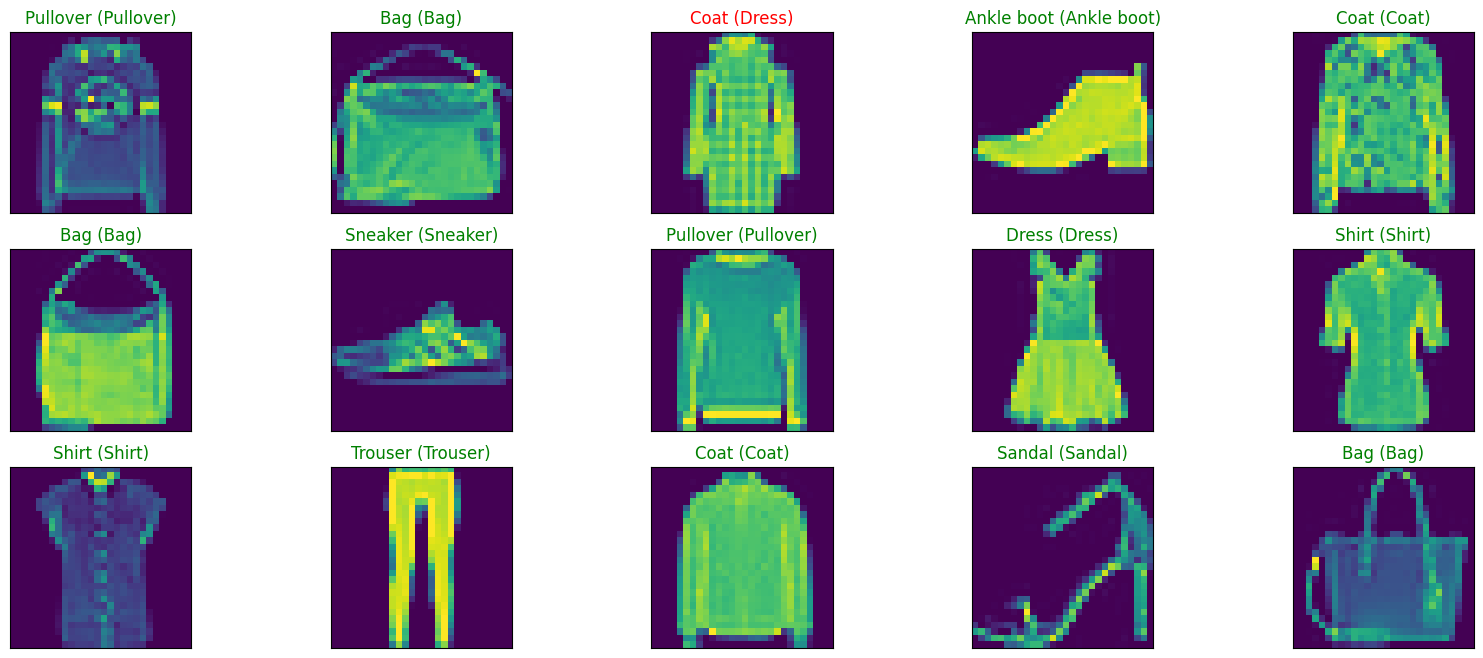

In [ ]:
y_hat = model.predict(x_test)

# Graficar una muestra aleatoria de 10 imágenes de prueba, sus etiquetas predichas y las etiquetas reales.
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Mostrar cada imagen
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    # Establecer el título para cada imagen
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index],
                                  fashion_mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

## ¡Felicidades!
Has entrenado exitosamente una CNN para clasificar fashion-MNIST con una precisión cercana al 90%.